In [1]:
import numpy as np
import vedo
import os
from tqdm import tqdm
from MeshObject import *
import pandas as pd

shape_path = "../ShapeDatabase_INFOMR_norm"
# HISTOGRAM FOR EACH NORMALIZATION STEP
# FOR PCA STEP - COMPUTE PCA FIRST, THEN COMPUTE PCA SECOND TIME ON ALIGNED SHAPE = IF DOT PRODUCT IS 1 FOR ONE (OR ALL?) AXIS - IT'S ALL GOOD

In [2]:
def object_statistics(mesh: MeshObject):
    return {
        "name": mesh.name,
        "class": mesh.class_type,
        "nfaces": mesh.n_faces,
        "nvertices": mesh.n_vertices,
        "face_type": mesh.face_type,
        "bounding_box": mesh.bounding_box
    }

def dataset_statistics(shape_path):
    #### BOUNDING BOX!! AXIS ALIGNED VIA XMAX-XMIN - compare with builtin bounds()
    stats = {
        "name": [],
        "class": [],
        "nfaces": [],
        "nvertices": [],
        "face_type": [],
        "bounding_box": []
    }

    # remove any directories that might not contain .obj files
    classes = [class_type for class_type in os.listdir(shape_path) if os.path.isdir((os.path.join(shape_path, class_type))) and class_type != ".git"]
    for class_type in tqdm(classes):
        class_path = os.path.join(shape_path, class_type)

        for obj_name in os.listdir(class_path):
            obj_path = os.path.join(class_path, obj_name)
            obj = MeshObject(obj_path, False, name=obj_name, class_type=class_type)

            # add to global dictionary
            obj_stats = object_statistics(obj)
            for attribute in stats.keys():
                stats[attribute].append(obj_stats[attribute]) 

    return stats

stats = dataset_statistics(shape_path)

100%|██████████| 69/69 [00:49<00:00,  1.40it/s]


In [3]:
df = pd.DataFrame(stats)
# df.to_csv("refined_data_statistics.csv", index=False)
df.to_pickle("refined_data_statistics.pickle")
df

,name,class,nfaces,nvertices,face_type,bounding_box
0,m433.obj,House,9863,5276,triangle,"[-0.46188408, 0.53811592, -0.46489933, 0.50235..."
1,m440.obj,House,10678,5297,triangle,"[-0.38273731, 0.61726266, -0.32504717, 0.36149..."
2,m448.obj,House,10022,5360,triangle,"[-0.46365374, 0.46596572, -0.43293464, 0.56706..."
3,D00359.obj,House,12004,10234,triangle,"[-0.5284971, 0.4715029, -0.41338819, 0.4748446..."
4,D00389.obj,House,19365,15205,triangle,"[-0.50855732, 0.49144271, -0.38384286, 0.38084..."
...,...,...,...,...,...,...
2478,m666.obj,Gun,9521,4996,triangle,"[-0.38311028, 0.61688972, -0.22052798, 0.28917..."
2479,D00929.obj,Gun,10364,5220,triangle,"[-0.40961415, 0.59038585, -0.25394344, 0.32130..."
2480,m664.obj,Gun,11150,5587,triangle,"[-0.5101918, 0.48980817, -0.24766345, 0.289431..."
2481,m650.obj,Gun,10024,5302,triangle,"[-0.40137282, 0.59862721, -0.27414984, 0.28864..."


# Finding different shapes accroding to vertex/face count

In [4]:
from math import ceil
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
avg_vertex_num = np.mean(df.nvertices)
avg_face_num = np.mean(df.nfaces)

vertex_avg = np.argmin([abs(shape-avg_vertex_num) for shape in df.nvertices.to_numpy()])
face_avg = np.argmin([abs(shape-avg_face_num) for shape in df.nfaces.to_numpy()])

vertex_min = np.argmin(df.nvertices.to_numpy())
face_min = np.argmin(df.nfaces.to_numpy())

vertex_max = np.argmax(df.nvertices.to_numpy())
face_max = np.argmax(df.nfaces.to_numpy())

print(f"ID of shape with an average count of vertices {vertex_avg}={df.iloc[vertex_avg].nvertices}, with the average number being {avg_vertex_num:.3f}")
print(f"ID of shape with an average count of vertices {face_avg}={df.iloc[face_avg].nfaces}, with the average number being {avg_face_num:.3f}")
print("-----------------")
print(f"ID of shape with lowest count of vertices {vertex_min}={df.iloc[vertex_min].nvertices}")
print(f"ID of shape with lowest count of faces {face_min}={df.iloc[face_min].nfaces}")
print("-----------------")
print(f"ID of shape with highest count of vertices {vertex_max}={df.iloc[vertex_max].nvertices}")
print(f"ID of shape with highest count of faces {face_max}={df.iloc[face_max].nfaces}")

ID of shape with an average count of vertices 1563=6599, with the average number being 6603.619
ID of shape with an average count of vertices 1608=12337, with the average number being 12338.371
-----------------
ID of shape with lowest count of vertices 195=1512
ID of shape with lowest count of faces 195=1712
-----------------
ID of shape with highest count of vertices 1006=544313
ID of shape with highest count of faces 1006=1085016


## Average shape

In [6]:
avg_shape_vertex = df.iloc[vertex_avg]
avg_shape_face = df.iloc[face_avg]
avg_shape_vertex, avg_shape_face

(name                                                   D00771.obj
 class                                                        Ship
 nfaces                                                      10124
 nvertices                                                    6599
 face_type                                                triangle
 bounding_box    [-0.47036001, 0.52963996, -0.046939939, 0.0604...
 Name: 1563, dtype: object,
 name                                                   D00122.obj
 class                                                  PianoBoard
 nfaces                                                      12337
 nvertices                                                    9784
 face_type                                                triangle
 bounding_box    [-0.50740391, 0.49259609, -0.027063819, 0.6738...
 Name: 1608, dtype: object)

In [7]:
os.path.join(shape_path, avg_shape_vertex["class"], avg_shape_vertex["name"])

'../ShapeDatabase_INFOMR_norm/Ship/D00771.obj'

In [8]:
mesh = MeshObject(os.path.join(shape_path, avg_shape_vertex["class"], avg_shape_vertex["name"]), visualize=True, name=avg_shape_vertex["name"], class_type=avg_shape_vertex["class"])
mesh.plotter.title = "Average shape in terms of number of vertices"
mesh.show()

In [9]:
mesh = MeshObject(os.path.join(shape_path, avg_shape_face["class"], avg_shape_face["name"]), visualize=True)
mesh.plotter.title = "Average shape in terms of number of faces"
mesh.show()

## Minimum shape

In [10]:
min_shape_vertex = df.iloc[vertex_min]
min_shape_face = df.iloc[face_min]
min_shape_vertex, min_shape_face

(name                                                     m836.obj
 class                                                   MultiSeat
 nfaces                                                       1712
 nvertices                                                    1512
 face_type                                                triangle
 bounding_box    [-0.37503064, 0.62496936, -0.28080571, 0.32552...
 Name: 195, dtype: object,
 name                                                     m836.obj
 class                                                   MultiSeat
 nfaces                                                       1712
 nvertices                                                    1512
 face_type                                                triangle
 bounding_box    [-0.37503064, 0.62496936, -0.28080571, 0.32552...
 Name: 195, dtype: object)

In [11]:
mesh = MeshObject(os.path.join(shape_path, min_shape_vertex["class"], min_shape_vertex["name"]), visualize=True)
mesh.plotter.title = "Smallest shape in terms of number of vertices"
mesh.show()

In [12]:
mesh = MeshObject(os.path.join(shape_path, min_shape_face["class"], min_shape_face["name"]), visualize=True)
mesh.plotter.title = "Smallest shape in terms of number of faces"
mesh.show()

## Maximum

In [13]:
max_shape_vertex = df.iloc[vertex_max]
max_shape_face = df.iloc[face_max]
max_shape_vertex, max_shape_face

(name                                                   D01180.obj
 class                                                       Train
 nfaces                                                    1085016
 nvertices                                                  544313
 face_type                                                triangle
 bounding_box    [-0.49529985, 0.50470018, -0.071280032, 0.1075...
 Name: 1006, dtype: object,
 name                                                   D01180.obj
 class                                                       Train
 nfaces                                                    1085016
 nvertices                                                  544313
 face_type                                                triangle
 bounding_box    [-0.49529985, 0.50470018, -0.071280032, 0.1075...
 Name: 1006, dtype: object)


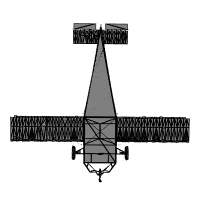

In [14]:
MeshObject(shape_path + "/Biplane/m1120.obj", visualize=True).non_manifold_faces(tol=0).fill_holes()

In [15]:
mesh = MeshObject(os.path.join(shape_path, max_shape_vertex["class"], max_shape_vertex["name"]), visualize=True)
mesh.plotter.title = "Biggest shape in terms of number of vertices"
mesh.show()

In [16]:
mesh = MeshObject(os.path.join(shape_path, max_shape_face["class"], max_shape_face["name"]), visualize=True)
mesh.plotter.title = "Biggest shape in terms of number of faces"
mesh.show()

In [17]:
df[df["class"] == "Skyscraper"].nvertices.max()

np.int64(120989)

# Overall statistics

In [18]:
def plot_attribute(df, attribute_x, attribute_y, estimator,old_mean):
    label_name_map = {
        "nvertices": "vertices",
        "nfaces": "faces",
        "class": "shapes"
    }

    aux_df = df
    sns.set_theme(style="whitegrid")

    plt.figure(figsize=(16,9))
    if type(df[attribute_y].iloc[0]) is not str:
        mean_value_attribute = np.mean(df[attribute_y])
        aux_df = df.sort_values(attribute_x, ascending=False).reset_index(drop=True)
        sns.barplot(data=aux_df, y=attribute_y, x=attribute_x, estimator=estimator) # switch to sum/mean - mean might not be best?
    else:
        mean_value_attribute = np.mean(aux_df["class"].value_counts())
        sns.countplot(data=aux_df, x="class", order=aux_df["class"].value_counts().index) # switch to sum/mean - mean might not be best?
        
    plt.xticks(rotation=90)
    sns.despine()
    if type(df[attribute_y].iloc[0]) is not str:
        plt.text(x=64, y=old_mean + mean_value_attribute*0.05, s=f"{old_mean}", color="red")
    else:
        plt.text(x=64, y=old_mean + 2, s=f"{mean_value_attribute:.3f}", color="red")

    plt.hlines(y=old_mean, xmin=-1, xmax=69, colors="red", linestyles="dashed")
    plt.xlim((-1,69))
    plt.xlabel("Class")
    plt.ylabel(f"Number of {label_name_map[attribute_y]}")
    name = f"normalized_{attribute_x}_{attribute_y}_plot.png"
    plt.savefig(name)
    plt.show()

In [19]:
len(df[df["nvertices"] < 6000])

2223

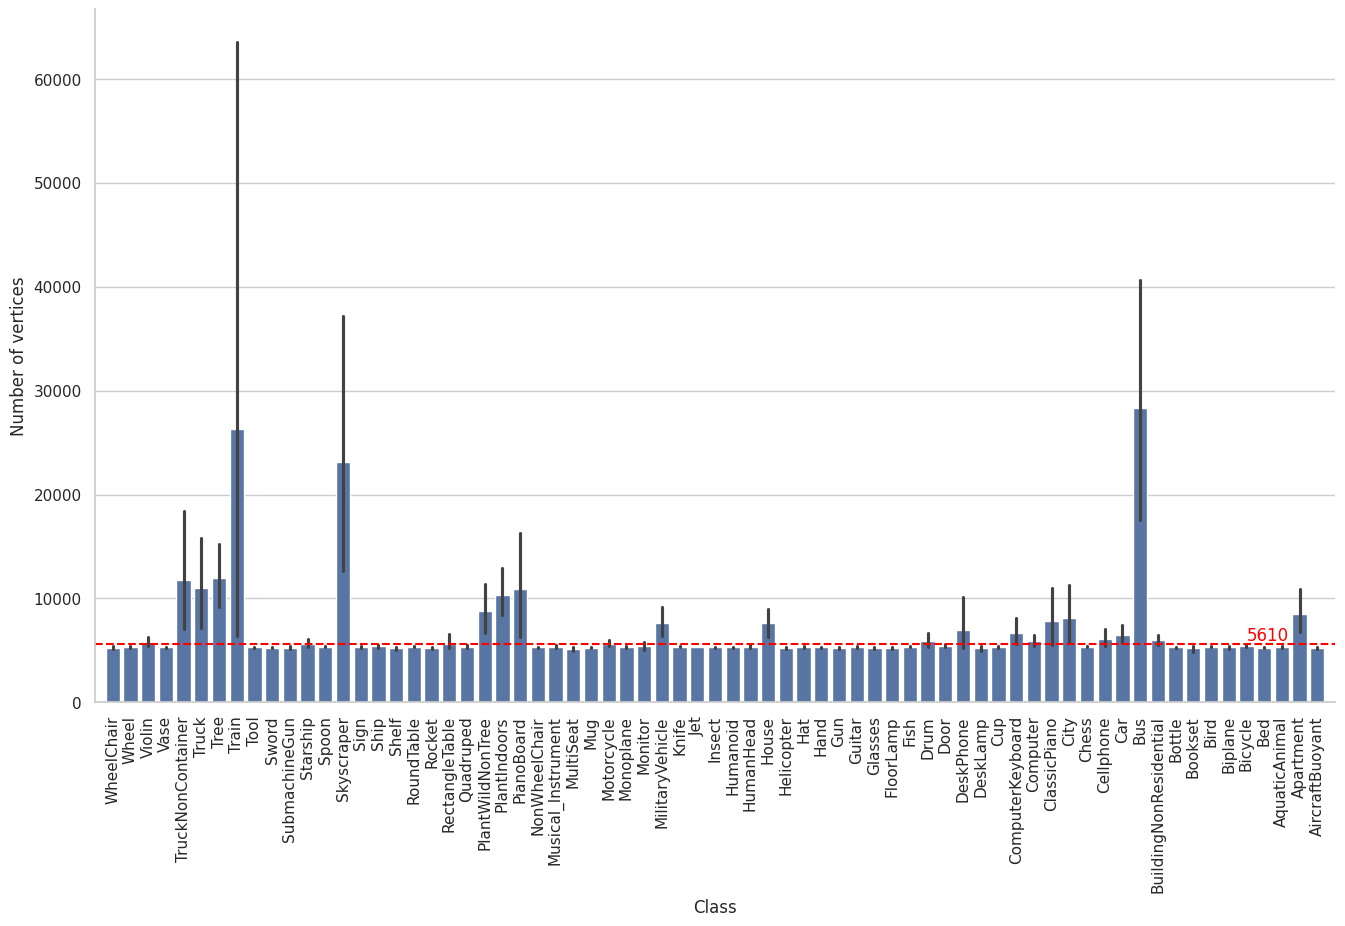

In [20]:
plot_attribute(df, "class", "nvertices", "mean", 5610)

In [21]:
df.columns

Index(['name', 'class', 'nfaces', 'nvertices', 'face_type', 'bounding_box'], dtype='object')

show vertex for entire dataset rather than per class

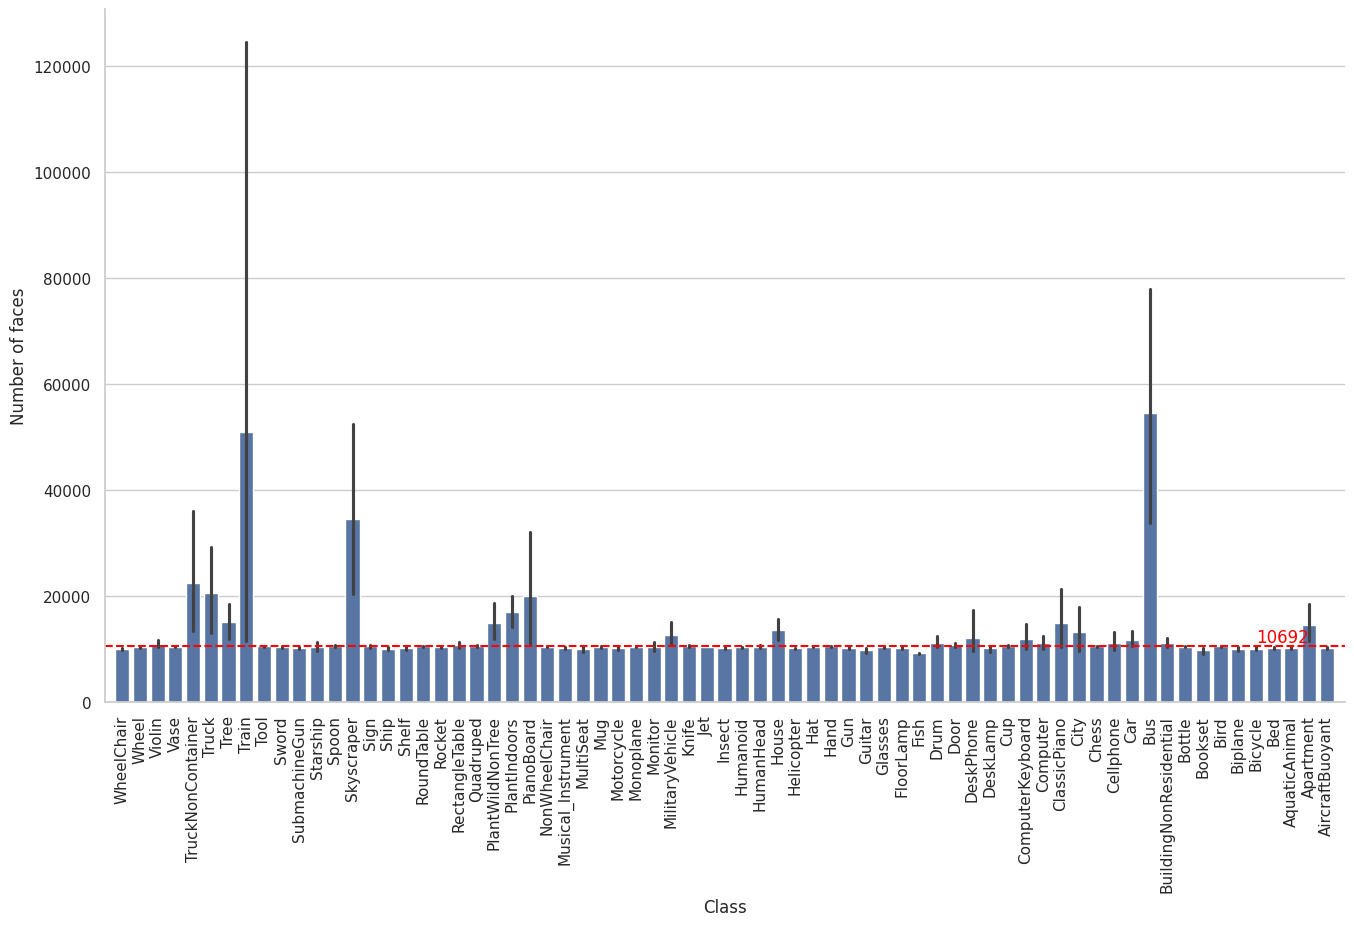

In [23]:
plot_attribute(df, "class", "nfaces", "mean", 10692)

In [24]:
df[(df["nfaces"] < 100) | (df["nvertices"] < 100)]

,name,class,nfaces,nvertices,face_type,bounding_box


In [25]:
classes = [class_type for class_type in os.listdir(shape_path) if os.path.isdir((os.path.join(shape_path, class_type))) and class_type != ".git"]

In [108]:
classes = [class_type for class_type in os.listdir(shape_path) if os.path.isdir((os.path.join(shape_path, class_type))) and class_type != ".git"]
center_of_mass_diff = []
scaling_check = []
scaling_axes = []
for class_type in tqdm(classes):
    class_path = os.path.join(shape_path, class_type)
    class_path_orig = os.path.join(shape_path.removesuffix("_norm") + "_orig", class_type)

    for obj_name in os.listdir(class_path):
        obj_path = os.path.join(class_path, obj_name)
        obj_path_orig = os.path.join(class_path_orig, obj_name)

        obj = MeshObject(obj_path, False)
        obj_orig = MeshObject(obj_path_orig, False)

        # center_of_mass_diff += [np.round(np.zeros(3) - obj.center_of_mass(), 6)]
        center_of_mass_diff += [[abs(np.round(np.linalg.norm(np.zeros(3)-obj.center_of_mass()), 6)), abs(np.round(np.linalg.norm(np.zeros(3)-obj_orig.center_of_mass()), 6))]]
        scaling_check += [[obj.volume(), obj_orig.volume(), obj_path]]
        scaling_axes += [[obj.bounding_box, obj_orig.bounding_box]]

center_of_mass_diff = np.asarray(center_of_mass_diff)
scaling_check = np.asarray(scaling_check)
scaling_axes = np.asarray(scaling_axes)

100%|██████████| 69/69 [02:06<00:00,  1.84s/it]


In [124]:
df.iloc[df["nvertices"].argmax()]

name                                                   D01180.obj
class                                                       Train
nfaces                                                    1085016
nvertices                                                  544313
face_type                                                triangle
bounding_box    [-0.49529985, 0.50470018, -0.071280032, 0.1075...
Name: 1006, dtype: object

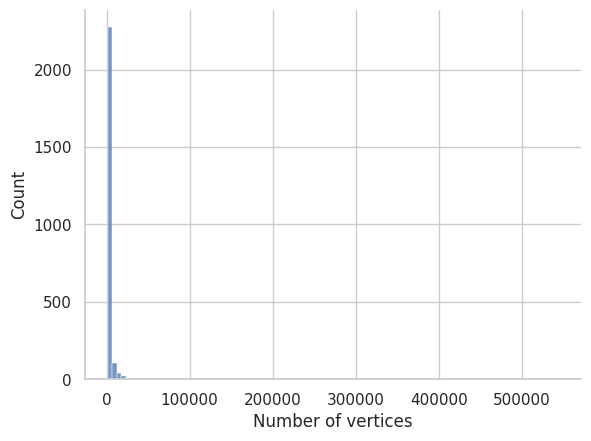

In [30]:
sns.set_theme(style="whitegrid")
sns.histplot(x=df["nvertices"], bins=100)
plt.xlabel("Number of vertices")
sns.despine()
plt.savefig("nvertices_after.png", transparent=True)

In [109]:
aux_scaling = {
    "x": np.abs(scaling_axes[:,0][:,0]) + np.abs(scaling_axes[:,0][:,1]), 
    "y": np.abs(scaling_axes[:,0][:,2]) + np.abs(scaling_axes[:,0][:,3]),
    "z": np.abs(scaling_axes[:,0][:,4]) + np.abs(scaling_axes[:,0][:,5])
    }
aux_scaling_orig = {
    "x": np.abs(scaling_axes[:,1][:,0]) + np.abs(scaling_axes[:,1][:,1]), 
    "y": np.abs(scaling_axes[:,1][:,2]) + np.abs(scaling_axes[:,1][:,3]),
    "z": np.abs(scaling_axes[:,1][:,4]) + np.abs(scaling_axes[:,1][:,5])
    }

In [113]:
matrix_scale = [aux_scaling["x"], aux_scaling["y"], aux_scaling["z"]]
matrix_scale = np.asarray(matrix_scale)
matrix_scale_orig = [aux_scaling_orig["x"], aux_scaling_orig["y"], aux_scaling_orig["z"]]
matrix_scale_orig = np.asarray(matrix_scale_orig)
matrix_scale.shape, matrix_scale_orig.shape

((3, 2483), (3, 2483))

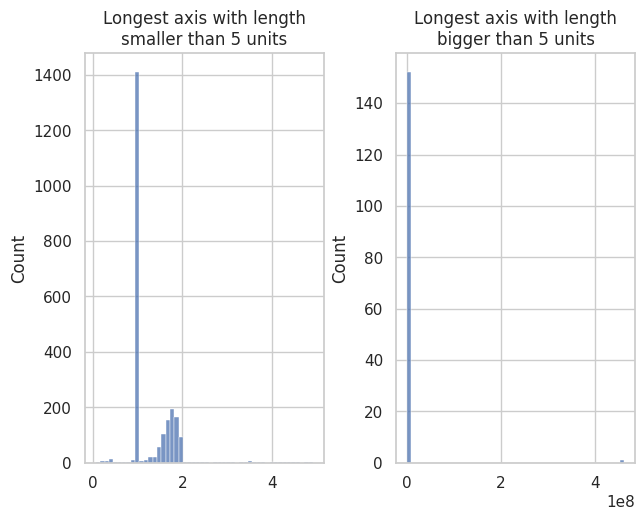

In [123]:
max_bb = np.round(np.max(matrix_scale_orig, axis=0), 6)
fig, axes = plt.subplots(1,2)
plt.tight_layout()
sns.histplot(max_bb[max_bb < 5], bins=50, ax=axes[0]) # diff between barycenter and origin
axes[0].set_title("Longest axis with length\nsmaller than 5 units")
sns.histplot(max_bb[max_bb >= 5], bins=50, ax=axes[1]) # diff between barycenter and origin
axes[1].set_title("Longest axis with length\nbigger than 5 units")
plt.savefig("longest_axis_before.png", transparent=True, bbox_inches="tight")

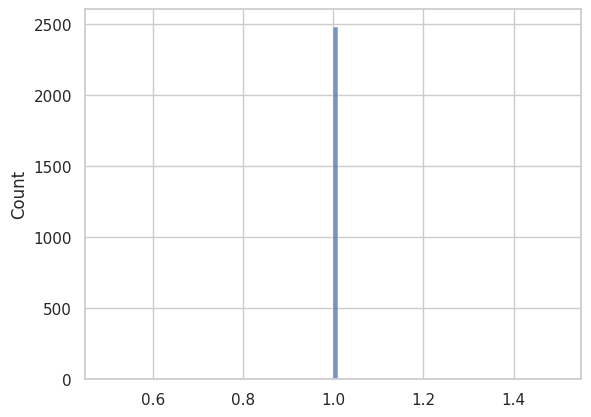

In [111]:
max_bb = np.round(np.max(matrix_scale, axis=0), 6)
sns.histplot(max_bb, bins=100) # longest axis
plt.savefig("longest_axis_after.png", transparent=True)

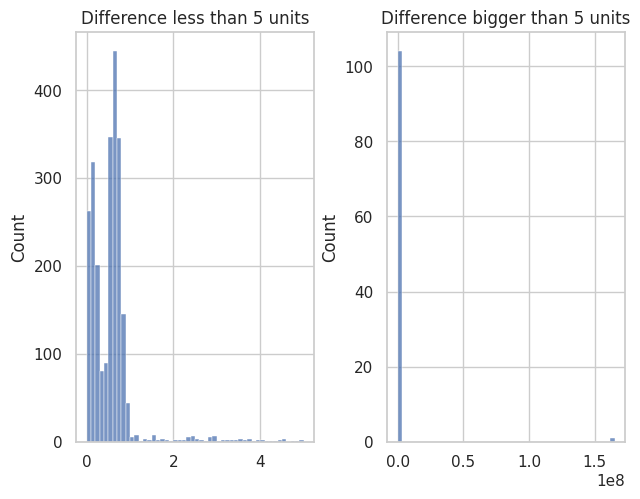

In [119]:
fig, axes = plt.subplots(1,2)
plt.tight_layout()
sns.histplot(center_of_mass_diff[:,1][center_of_mass_diff[:,1] < 5], bins=50, ax=axes[0]) # diff between barycenter and origin
axes[0].set_title("Difference less than 5 units")
sns.histplot(center_of_mass_diff[:,1][center_of_mass_diff[:,1] >= 5], bins=50, ax=axes[1]) # diff between barycenter and origin
axes[1].set_title("Difference bigger than 5 units")
plt.savefig("diff_barycenter_before.png", transparent=True)

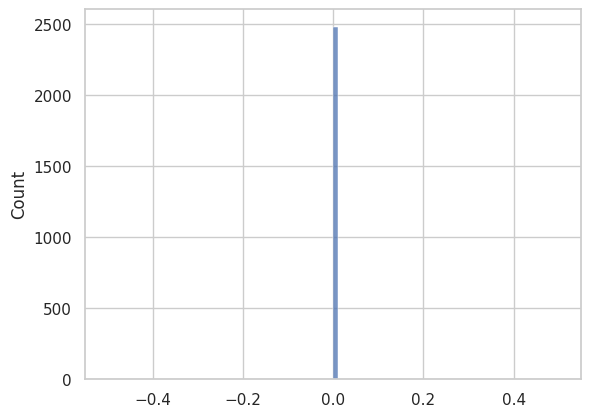

In [60]:
sns.histplot(center_of_mass_diff[:,0], bins=100) # diff between barycenter and origin
plt.savefig("diff_barycenter.png", transparent=True)

In [32]:
# show largest axis per shape instead of all axes

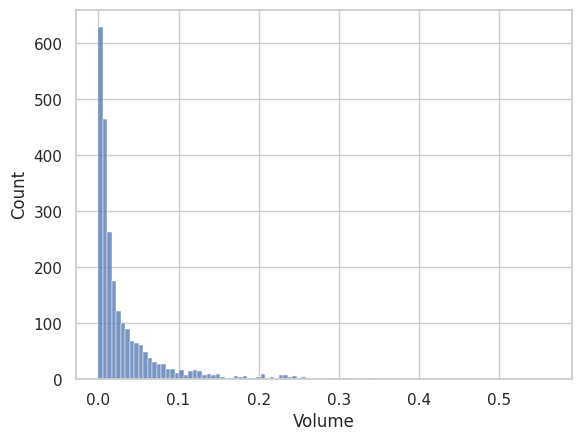

In [28]:
sns.histplot(x=scaling_check[:,0].astype(float), bins=100)
plt.xlabel("Volume")
plt.savefig("volume_check.png", transparent=True)

In [29]:
from Pipeline import *
pipeline = Pipeline()

vectors = {
    "normalized": [],
    "normalized_dot": [],
    "original": [],
    "original_dot": []
}
evalues = {
    "original": [],
    "normalized": []
}
for class_type in tqdm(classes):
    class_path = os.path.join(shape_path, class_type)
    class_path_orig = os.path.join(shape_path.removesuffix("_norm") + "_orig", class_type)

    for obj_name in os.listdir(class_path):
        obj_path = os.path.join(class_path, obj_name)
        obj_path_orig = os.path.join(class_path_orig, obj_name)

        obj = MeshObject(obj_path, False)
        obj_orig = MeshObject(obj_path_orig, False)

        # center_of_mass_diff += [np.round(np.zeros(3) - obj.center_of_mass(), 6)]
        eigen_vals, eigen_vectors = pipeline._eigen_vectors(obj)
        eigen_vals_orig, eigen_vectors_orig = pipeline._eigen_vectors(obj_orig)

        vectors["original_dot"] += [[
            np.round(np.abs(np.dot([1,0,0], eigen_vectors_orig[:,0])),5), # x axis and major eigen vector
            np.round(np.abs(np.dot([0,1,0], eigen_vectors_orig[:,0])),5), # y axis and major eigen vector
            np.round(np.abs(np.dot([0,0,1], eigen_vectors_orig[:,0])),5), # z axis and major eigen vector
            ]]
        vectors["original"] += [eigen_vectors_orig.T]

        vectors["normalized_dot"] += [[
            np.round(np.abs(np.dot([1,0,0], eigen_vectors[:,0])),5), # x axis and major eigen vector
            np.round(np.abs(np.dot([0,1,0], eigen_vectors[:,0])),5), # y axis and major eigen vector
            np.round(np.abs(np.dot([0,0,1], eigen_vectors[:,0])),5), # z axis and major eigen vector
            ]]
        vectors["normalized"] += [eigen_vectors.T]

        evalues["original"] += [eigen_vals_orig]
        evalues["normalized"] += [eigen_vals]

100%|██████████| 69/69 [01:49<00:00,  1.58s/it]


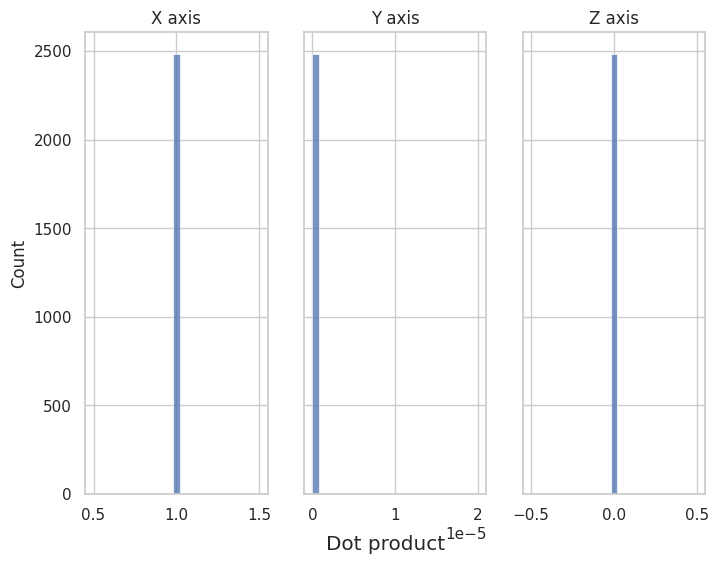

In [47]:
fig, axes = plt.subplots(1,3, figsize=(8,6), sharey=True)
vecs = np.asarray(vectors["normalized_dot"])
sns.histplot(vecs[:,0], bins=25, ax=axes[0]) # x axis
sns.histplot(vecs[:,1], bins=25, ax=axes[1]) # y axis
sns.histplot(vecs[:,2], bins=25, ax=axes[2]) # z axis
fig.supxlabel("Dot product")
axes[0].set_title("X axis")
axes[1].set_title("Y axis")
axes[2].set_title("Z axis")
plt.savefig("nornmalized_pca_dotproduct_majoreigenvector-xyzaxes.png", transparent=True)
# plt.savefig("nornmalized_pca_dotproduct_mediumeigenvector-xyzaxes.png")

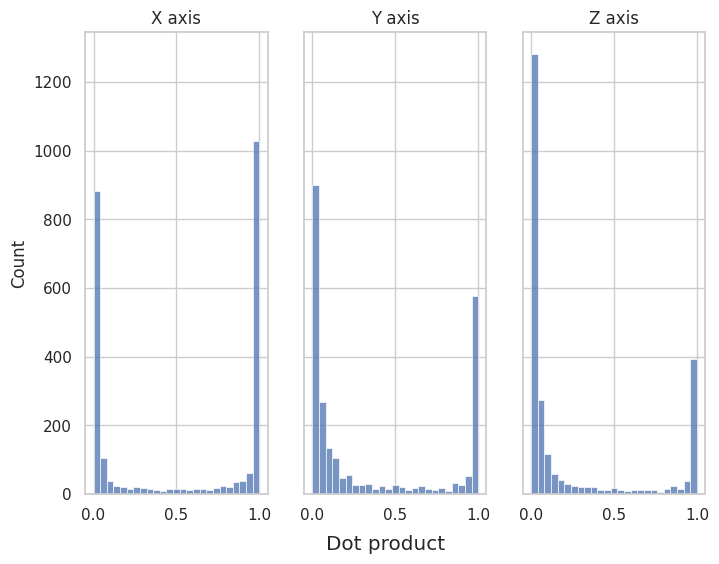

In [48]:
fig, axes = plt.subplots(1,3, figsize=(8,6), sharey=True)
vecs = np.asarray(vectors["original_dot"])
sns.histplot(vecs[:,0], bins=25, ax=axes[0]) # x axis
sns.histplot(vecs[:,1], bins=25, ax=axes[1]) # y axis
sns.histplot(vecs[:,2], bins=25, ax=axes[2]) # z axis
fig.supxlabel("Dot product")
axes[0].set_title("X axis")
axes[1].set_title("Y axis")
axes[2].set_title("Z axis")
plt.savefig("beforenorm_pca_dotproduct_majoreigenvector-xyzaxes.png", transparent=True)
# plt.savefig("beforenorm_pca_dotproduct_mediumeigenvector-xyzaxes.png", transparent=True)